In [42]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df= pd.read_csv('insurance.csv')
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
506,22,male,31.350,1,no,northwest,2643.26850
1000,30,male,22.990,2,yes,northwest,17361.76610
683,53,male,24.320,0,no,northwest,9863.47180
429,27,female,30.400,3,no,northwest,18804.75240
272,41,male,37.050,2,no,northwest,7265.70250
114,52,male,32.205,3,no,northeast,11488.31695
384,44,male,22.135,2,no,northeast,8302.53565
64,20,female,22.420,0,yes,northwest,14711.74380
607,59,female,23.655,0,yes,northwest,25678.77845
1222,50,male,25.300,0,no,southeast,8442.66700


In [5]:
df.describe()
##this gives the 5point summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape
##shape of data

(1338, 7)

In [7]:
df.dtypes
##data types of each column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isnull().sum()
##check missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

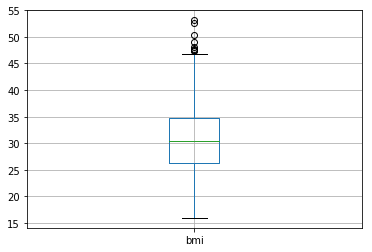

In [9]:
#distribution of BMI, Age, Charges are done separately because the values are very high in charges, so the BMI, Age plots are not visible. 
df.boxplot('bmi')

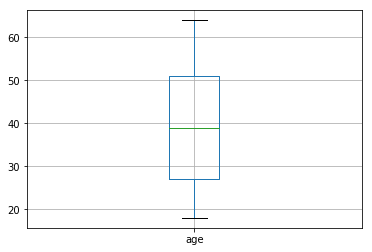

In [10]:
df.boxplot('age')

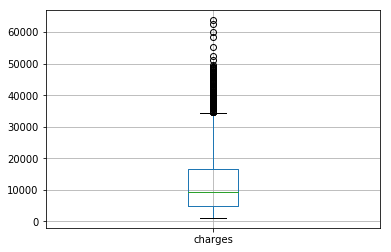

In [11]:
df.boxplot('charges')

In [12]:
#measure of Skewness
df1=df[['bmi', 'age', 'charges']]
df1.skew(axis = 0, skipna = True)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

In [13]:
df1.head(10)

,bmi,age,charges
0,27.900,19,16884.92400
1,33.770,18,1725.55230
2,33.000,28,4449.46200
3,22.705,33,21984.47061
4,28.880,32,3866.85520
5,25.740,31,3756.62160
6,33.440,46,8240.58960
7,27.740,37,7281.50560
8,29.830,37,6406.41070
9,25.840,60,28923.13692


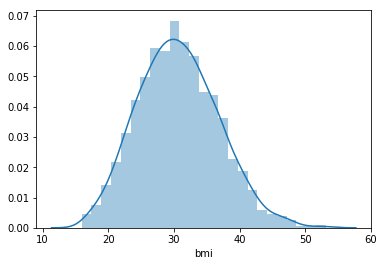

In [14]:
sns.distplot(df1['bmi'])

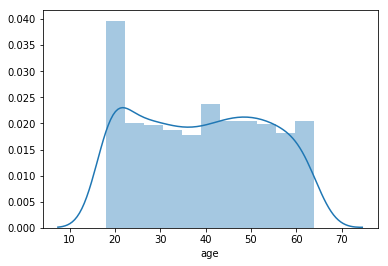

In [15]:
sns.distplot(df1['age'])

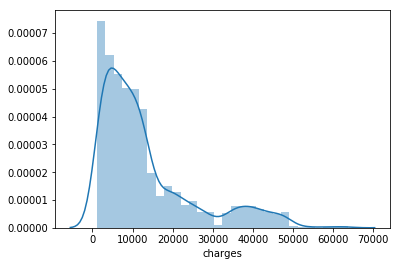

In [16]:
sns.distplot(df1['charges'])

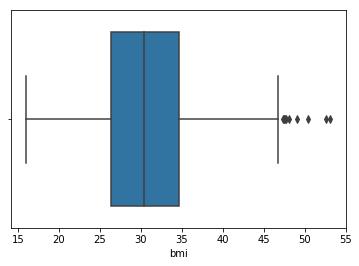

In [17]:
##finding outliars
sns.boxplot(x=df['bmi'])

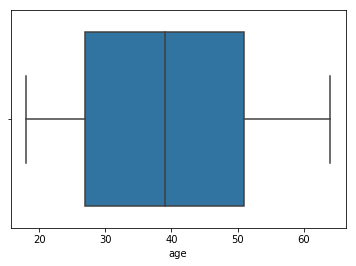

In [18]:
sns.boxplot(x=df['age'])

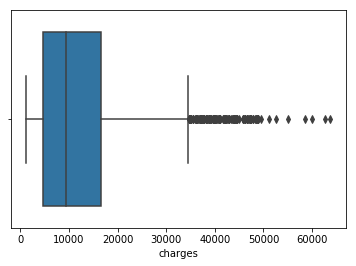

In [19]:
sns.boxplot(x=df['charges'])

In [46]:
#there is outliars in BMI and Charges columns, however none in age. This was also done above without using seaborn

In [20]:
df2=df[['sex', 'smoker', 'region']]

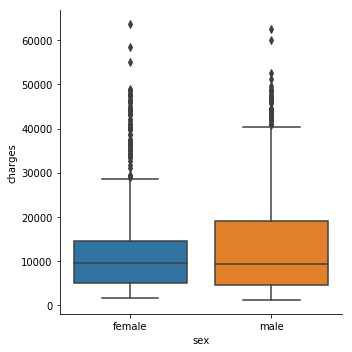

In [26]:
##distribution of categorical - sex, smoker and region against charges. One extra for children
sns.catplot(x="sex",y="charges",kind="box",data=df)

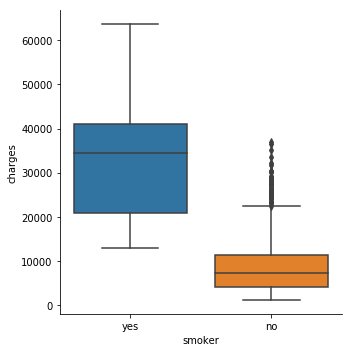

In [24]:
sns.catplot(x="smoker",y="charges",kind="box",data=df)

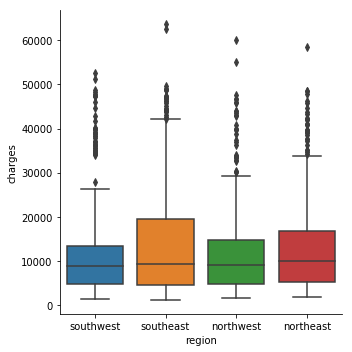

In [25]:
sns.catplot(x="region",y="charges",kind="box",data=df)

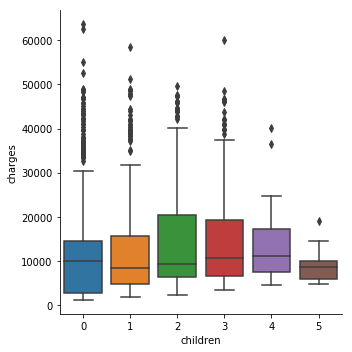

In [27]:
sns.catplot(x="children",y="charges",kind="box",data=df)

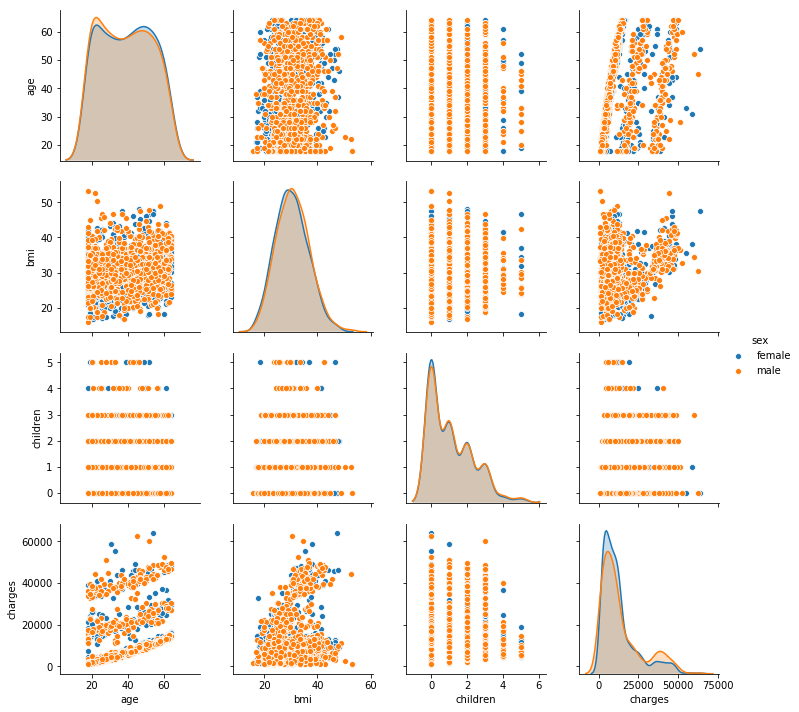

In [31]:
##pairplot
sns.pairplot(df,hue='sex')

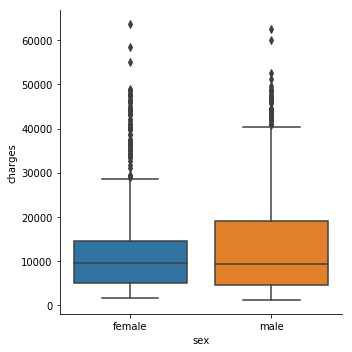

In [32]:
sns.catplot(x="sex", y="charges",
            kind="box", dodge=False, data=df);

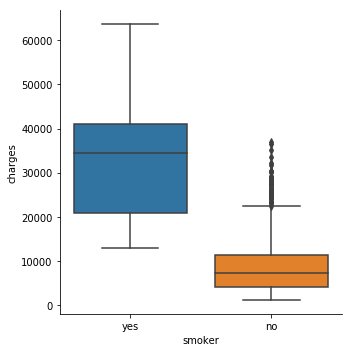

In [33]:
sns.catplot(x="smoker",y="charges",kind="box",data=df)

In [34]:
##from above, we can say that charges of people who smoke is different (more) than people who dont

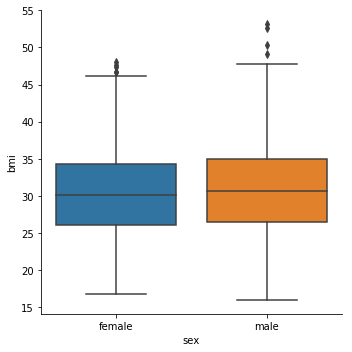

In [37]:
sns.catplot(x="sex",y="bmi",kind="box",data=df)

In [43]:
## from above we can say that the BMI of male is not significantly different than female

In [45]:
mBMI=df['bmi'].loc[df['sex']=='male']
fBMI=df['bmi'].loc[df['sex']=='female']
t_statistic ,p_value =stats.ttest_ind(mBMI,fBMI)
print(t_statistic ,p_value)

1.696752635752224 0.08997637178984932


In [ ]:
## HA= BMI of male and female differ. 
##Ho= BMI of male and female do no differ
##since p value > alpha (alpha =0.05), we fail to reject null hypothesis OR as sloved by boxplot above: BMI of male is not significantly different than female

In [52]:
mSmoker=df['smoker'].loc[df['sex']=='male']

In [53]:
fSmoker=df['smoker'].loc[df['sex']=='female']

In [54]:
print("Number of male smokers is", len(mSmoker))

Number of male smokers is 676


In [58]:
print("Number of female smokers is", len(fSmoker))

Number of female smokers is 662


In [ ]:
## proprotion of smoker in male and female is not significantly different. 

In [67]:
dff=df[df.sex == 'female']

In [74]:
dff=dff[dff.children <=2]

In [75]:
dff.head

<bound method NDFrame.head of       age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
9      60  female  25.84         0     no  northwest  28923.13692
11     62  female  26.29         0    yes  southeast  27808.72510
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[566 rows x 7 columns]>

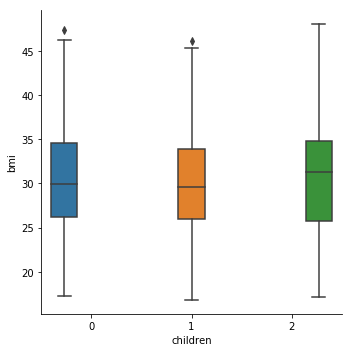

In [76]:
sns.catplot(x="children",y="bmi",hue="children",kind="box",data=dff)
##Is the distribution of bmi across women with no children, one child and two children, the same ?

In [ ]:
## the distribution of bmi across women with nochildren, one child and two children are the same